In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__) 


TensorFlow version: 2.13.0


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense


In [6]:
num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

print("Training data:", x_train.shape)
print("Testing data:", x_test.shape)


17464789/17464789 [==============================] - 221s 13us/step
Training data: (25000,)
Testing data: (25000,)


In [8]:
max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

print("After padding:", x_train.shape)


After padding: (25000, 200)


In [9]:
model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=128, input_length=max_len))
model.add(Conv1D(filters=128, kernel_size=5, activation='relu'))
model.add(GlobalMaxPooling1D())
model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 128)          1280000   
                                                                 
 conv1d (Conv1D)             (None, 196, 128)          82048     
                                                                 
 global_max_pooling1d (Glob  (None, 128)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 10)                1290      
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1363349 (5.20 MB)
Trainable params: 1363349 (5.20 MB)
Non-trainable params: 0 (0.00 Byte)
__________________

In [10]:
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)


Epoch 1/5
313/313 [==============================] - 41s 122ms/step - loss: 0.4904 - accuracy: 0.7461 - val_loss: 0.3143 - val_accuracy: 0.8652
Epoch 2/5
313/313 [==============================] - 35s 113ms/step - loss: 0.2231 - accuracy: 0.9117 - val_loss: 0.2794 - val_accuracy: 0.8878
Epoch 3/5
313/313 [==============================] - 35s 113ms/step - loss: 0.0936 - accuracy: 0.9714 - val_loss: 0.3262 - val_accuracy: 0.8786
Epoch 4/5
313/313 [==============================] - 36s 114ms/step - loss: 0.0263 - accuracy: 0.9963 - val_loss: 0.3555 - val_accuracy: 0.8818
Epoch 5/5
313/313 [==============================] - 36s 114ms/step - loss: 0.0072 - accuracy: 0.9995 - val_loss: 0.3919 - val_accuracy: 0.8834


In [12]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")


782/782 [==============================] - 16s 20ms/step - loss: 0.3913 - accuracy: 0.8798
Test Accuracy: 87.98%


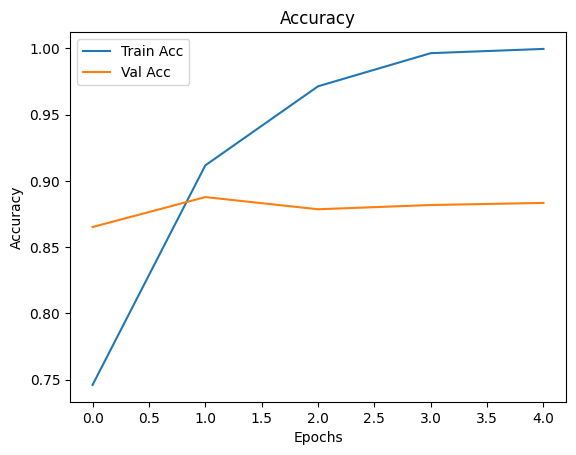

In [13]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


In [14]:
sample_review = x_test[0].reshape(1, max_len)
prediction = model.predict(sample_review)

print("Prediction:", "Positive" if prediction[0] > 0.5 else "Negative")
print("Actual Label:", "Positive" if y_test[0] == 1 else "Negative")


1/1 [==============================] - 0s 207ms/step
Prediction: Negative
Actual Label: Negative
